In [4]:
import numpy
import scipy.special

In [5]:
class Neural_network:
    def __init__(self,inputnodes,hiddenodes,outputnode,learningrate):
        self.inode=inputnodes
        self.hnode=hiddenodes
        self.onode=outputnode
        print('Input nodes:',self.inode,'Hidden nodes:',self.hnode,'Output nodes:',self.onode)
        
        self.wih=(numpy.random.rand(self.hnode,self.inode)-0.5)
        self.who=(numpy.random.rand(self.onode,self.hnode)-0.5)
        
        print('Matrix 1 \n',self.wih)
        print('Matrix 2 \n',self.who)
        
        self.lr=learningrate
        #activation function
        self.activation_function=lambda x:scipy.special.expit(x)
            
        
        pass
    def train(self,input_list,target_list):
        #convert the list into a 2d array
        input=numpy.array(input_list,ndmin=2).T
        target=numpy.array(target_list,ndmin=2).T
        
        #Calculate the signal into the hidden layer
        hidden_input=numpy.dot(self.wih,input)
        hidden_output=self.activation_function(hidden_input)
        
        #Signal to the final output layer
        final_input=numpy.dot(self.who,hidden_output)
        final_output=self.activation_function(final_input)
        
        #Output layer error
        output_error=target-final_output
        hidden_error=numpy.dot(self.who.T,output_error)
        
        #update the weight between the output and hidden layer(Back propagation)
        self.who+=self.lr*numpy.dot((output_error*final_output*(1.0-final_output)),numpy.transpose(hidden_output))
        #update the weight between the hidden layer and input
        self.wih+=self.lr*numpy.dot((hidden_error*hidden_output*(1.0-hidden_output)),numpy.transpose(input))
        
        
        pass
    def query(self,input_list):
        #convert input in 2d array
        input=numpy.array(input_list,ndmin=2).T
        
        #calculate signal into hidden layer
        hidden_input=numpy.dot(self.wih,input)
        #calculate signal out of the hidden layer
        hidden_output=self.activation_function(hidden_input)
        
        #calculate signal into output layer
        final_input=numpy.dot(self.who,hidden_output)
        #calculate signal out of the output layer
        final_output=self.activation_function(final_input)
        
        return final_output
        
        
        pass
    

In [6]:
n=Neural_network(inputnodes=3,hiddenodes=10,outputnode=3,learningrate=0.2)

Input nodes: 3 Hidden nodes: 10 Output nodes: 3
Matrix 1 
 [[ 0.41814448 -0.05592495 -0.21622908]
 [ 0.16334689 -0.11011634  0.1098966 ]
 [ 0.05022589 -0.05777915  0.00718877]
 [ 0.09951255 -0.23607754 -0.43366674]
 [-0.17859408  0.17301571  0.49227203]
 [ 0.3038652  -0.14933349 -0.03278522]
 [ 0.09737481  0.16559463  0.47681106]
 [-0.33721561  0.00574211  0.38732994]
 [ 0.0073911   0.20817429 -0.33094903]
 [-0.02578305 -0.17308009  0.30614099]]
Matrix 2 
 [[ 0.04047218  0.08167147 -0.06843693 -0.32227429  0.30102994 -0.40656883
  -0.22379406 -0.15560475  0.20795185  0.32630577]
 [-0.28918509 -0.06303283  0.05281226 -0.05606545  0.37163117  0.0917185
  -0.24267521  0.43487401  0.32514913 -0.23219254]
 [-0.32649172  0.22132759  0.14539767  0.40185866 -0.34039815  0.14773306
   0.28373048  0.45351542 -0.13821926  0.45850418]]


In [7]:
n.query([0.1,0.2,0.3])

array([[0.47633884],
       [0.55129823],
       [0.65867529]])

In [8]:
training_data=open('mnist_dataset/mnist_train_100.csv', 'r')
training_data_list=training_data.readlines()
training_data.close()


In [9]:
len(training_data_list)

100

In [10]:
example=training_data_list[0]
example


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
all_value_example_in_string=example.split(',')

In [12]:
all_value_example_in_string

['5',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '18',
 '18',
 '18',
 '126',
 '136',
 '175',
 '26',
 '166',
 '255',
 '247',


In [13]:
all_example=numpy.asfarray(all_value_example_in_string)

In [14]:
all_example

array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
label=all_example[0]
print('Label',label)

Label 5.0


In [16]:
picture=all_example[1:]

In [17]:
picture.shape

(784,)

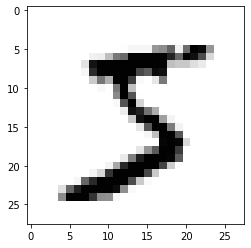

In [18]:
#Visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(picture.reshape(28,28),cmap='Greys',interpolation=None)


In [19]:
n=Neural_network(inputnodes=784,hiddenodes=200,outputnode=10,learningrate=0.1)

Input nodes: 784 Hidden nodes: 200 Output nodes: 10
Matrix 1 
 [[ 0.47002694  0.4975557   0.04755959 ...  0.10625485 -0.43187012
  -0.43349989]
 [-0.45041866 -0.40925149  0.1038525  ...  0.04066789 -0.45301712
  -0.04829664]
 [-0.31937364 -0.23756234 -0.07808753 ...  0.07018321  0.27748463
  -0.33619678]
 ...
 [-0.18324405  0.02710352 -0.02004402 ... -0.12815299 -0.04599908
  -0.1566155 ]
 [ 0.30467161  0.2838066   0.18099477 ... -0.39193681  0.0870272
  -0.14202863]
 [ 0.10920676  0.05138167 -0.43995477 ...  0.33190171  0.25536695
  -0.45022861]]
Matrix 2 
 [[-0.41859373  0.26011821 -0.21169084 ... -0.19898364 -0.46141964
   0.24713613]
 [ 0.08536077 -0.2236961  -0.29471968 ... -0.19333649  0.37362059
  -0.47127489]
 [ 0.02013232  0.41754761 -0.3026338  ... -0.04951379  0.2416764
   0.02354988]
 ...
 [ 0.26214185 -0.22051656 -0.4868232  ...  0.3579081   0.33038421
  -0.48846086]
 [-0.25027882  0.48287757  0.35562601 ...  0.03882433  0.03361118
  -0.00996048]
 [ 0.49564362  0.25148137 

In [20]:
epochs=20
output_node=10
for e in range(epochs):
    print('Epoch:',e+1)
    for record in training_data_list:
        all_value=record.split(',')
        input=(numpy.asfarray(all_value[1:])/255.0*0.99)+0.01
        target=numpy.zeros(output_node)+0.01
        target[int(all_value[0])]=0.99
        n.train(input,target)
        

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20


In [21]:
#Model prediction
test=open('mnist_dataset/mnist_test_10.csv','r')
test_data=test.readlines()
test.close()

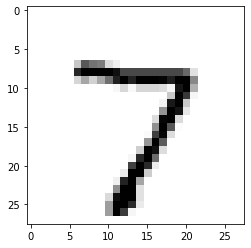

In [22]:
record=test_data[0]
all_value=record.split(',')
picture=numpy.asfarray(all_value[1:])
plt.imshow(picture.reshape(28,28),cmap='Greys',interpolation=None)

In [23]:
input=(numpy.asfarray(all_value[1:])/255*0.99)+0.01
input


array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [24]:
n.query(input)

array([[0.00997659],
       [0.00524847],
       [0.02765927],
       [0.01376455],
       [0.00807942],
       [0.01309199],
       [0.00173635],
       [0.97027081],
       [0.00669267],
       [0.05857768]])

In [25]:
#test the neural network
scorecard=[]
for record in test_data:
    all_value=record.split(',')
    true_label=int(all_value[0])
    input=(numpy.asfarray(all_value[1:])/255.0*0.99)+0.01
    #Query the network
    output=n.query(input)
    label=numpy.argmax(output)
    if (label==true_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
scorecard_array=numpy.asarray(scorecard)
print('Performance=',scorecard_array.sum()/scorecard_array.size)
    

Performance= 0.7


In [26]:
scorecard

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [42]:
import glob
import imageio


In [50]:
our_dataset=[]
for image_file in glob.glob('my_own_images/2828_my_own_?.png'):
    label=int(image_file[-5:-4])
    print('loading....',image_file)
    img_array=imageio.imread(image_file,as_gray=True)
    img_data=255.0-img_array.reshape(784)
    img_data=(img_data/255.0*0.99)+0.01
    record=numpy.append(label,img_data)
    our_dataset.append(record)
    
    
    

    
    



loading.... my_own_images\2828_my_own_0.png
loading.... my_own_images\2828_my_own_1.png
loading.... my_own_images\2828_my_own_2.png
loading.... my_own_images\2828_my_own_3.png
loading.... my_own_images\2828_my_own_4.png
loading.... my_own_images\2828_my_own_5.png
loading.... my_own_images\2828_my_own_6.png
loading.... my_own_images\2828_my_own_7.png
loading.... my_own_images\2828_my_own_8.png
loading.... my_own_images\2828_my_own_9.png


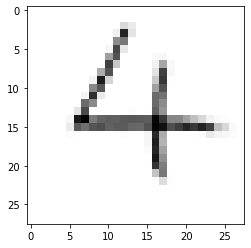

In [59]:
item=4
plt.imshow(our_dataset[item][1:].reshape(28,28),cmap='Greys',interpolation=None)

[[0.01774352]
 [0.06910918]
 [0.00477568]
 [0.1386783 ]
 [0.97471022]
 [0.02320097]
 [0.08710247]
 [0.01566784]
 [0.01809162]
 [0.08575178]]
Neural network result: 4


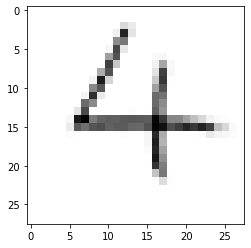

In [61]:
item=4
plt.imshow(our_dataset[item][1:].reshape(28,28),cmap='Greys',interpolation=None)
correct_label=our_dataset[item][0]
input=our_dataset[item][1:]
output=n.query(input)
print(output)
label=numpy.argmax(output)
print('Neural network result:',label)

